In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Twins players

twins_data = master_data.loc[master_data["Franchise"] == "Twins"]

#Only showing players that signed with the Twins

signed_twins_data = twins_data.loc[twins_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_twins_data.groupby("Year")

#Unsigned Twins draft picks

unsigned_twins_data = twins_data.loc[twins_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1989    75.4
1969    50.9
2001    38.6
1994    37.9
1991    35.7
2009    34.2
1990    31.0
2005    26.8
2012    26.8
1967    26.5
2002    26.0
1981    25.3
1965    22.7
1978    19.7
1995    18.9
1974    17.5
2003    15.4
1966    14.9
1977    13.4
1999    13.1
1987    12.5
2010    12.4
1976    11.9
2004    11.9
1984    10.9
1993    10.9
2008    10.8
1972    10.1
1997    10.1
1986     9.3
1980     9.3
1996     7.7
2007     7.3
2006     6.9
1971     5.5
1982     4.4
1979     3.5
2013     2.6
1998     2.1
1985     2.1
1968     1.3
2011     1.1
2014     1.0
2000     0.9
1975     0.4
1992     0.1
1983     0.0
2018     0.0
2016     0.0
2017     0.0
2019     0.0
2015    -0.1
1970    -0.9
1988    -2.2
1973    -2.5
Name: Total_WAR, dtype: float64

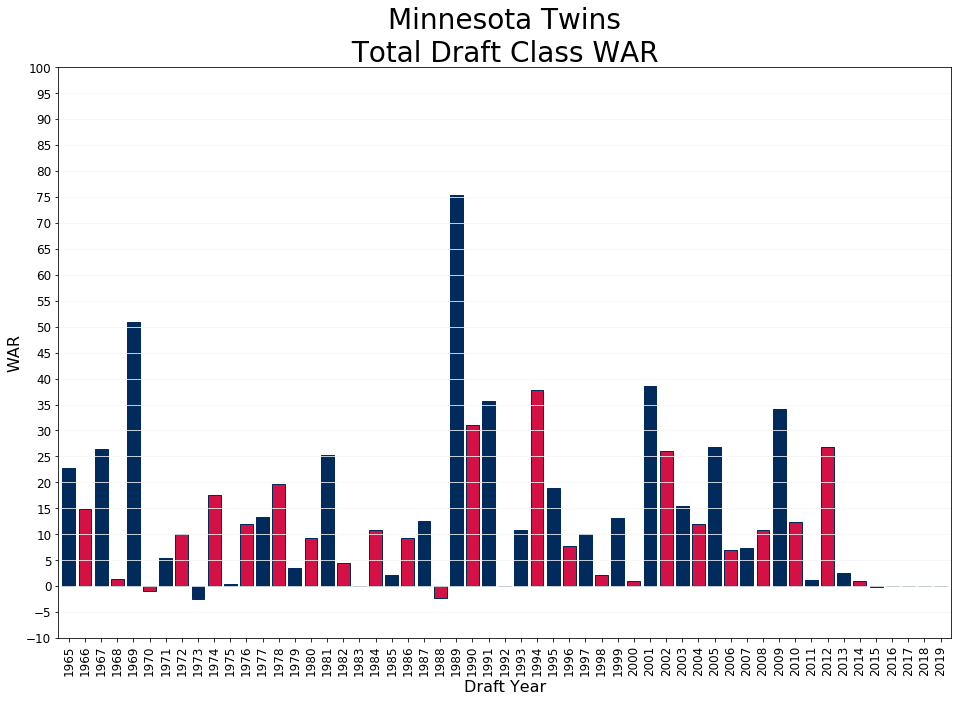

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#002B5C", "#D31145"], width = .8, fontsize = 12, edgecolor = "#002B5C", figsize = (16, 10.5))
plt.title("Minnesota Twins\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Twins WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_twins_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
3596,1969,3,55,Twins,Twins,Y,Bert Blyleven,1970.0,blylebe01,1001098.0,-0.8,49.1,48.3,RHP,HS,Santiago HS,Garden Grove,CA,More than 25 WAR
39749,2001,1,1,Twins,Twins,Y,Joe Mauer,2004.0,mauerjo01,1857.0,34.2,0.0,34.2,C,HS,Cretin HS,St. Paul,MN,More than 25 WAR
20978,1989,1,25,Twins,Twins,Y,Chuck Knoblauch,1991.0,knoblch01,609.0,33.6,0.0,33.6,SS,4Yr,Texas A&M University,College Station,TX,More than 25 WAR
24136,1991,8,206,Twins,Twins,Y,Brad Radke,1995.0,radkebr01,748.0,-0.1,25.0,24.9,RHP,HS,Jesuit HS,Tampa,FL,20-25 WAR
29376,1994,26,715,Twins,Twins,Y,Corey Koskie,1998.0,koskico01,738.0,23.2,0.0,23.2,3B,JC,Kwantlen College,Dugald,MB,20-25 WAR
73,1965,4,74,Twins,Twins,Y,Graig Nettles,1967.0,nettlgr01,1009517.0,23.0,0.0,23.0,3B,4Yr,San Diego State University,San Diego,CA,20-25 WAR
13221,1981,2,37,Twins,Twins,Y,Frank Viola,1982.0,violafr01,1013435.0,0.0,23.0,23.0,LHP,4Yr,St. John's University,Queens,NY,20-25 WAR
1751,1967,5,97,Twins,Twins,Y,Dave Goltz,1972.0,goltzda01,1004818.0,-0.1,22.7,22.6,RHP,HS,Rothsay HS,Rothsay,MN,20-25 WAR
41253,2002,1,20,Twins,Twins,Y,Denard Span,2008.0,spande01,8347.0,22.5,0.0,22.5,OF,HS,Catholic HS,Tampa,FL,20-25 WAR
51905,2009,8,252,Twins,Twins,Y,Brian Dozier,2012.0,doziebr01,9810.0,22.3,0.0,22.3,SS,4Yr,University of Southern Mississippi,Hattiesburg,MS,20-25 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_twins_data.loc[((signed_twins_data["WAR Group"] == "Less than 5 WAR") |
(signed_twins_data["WAR Group"] == "No Major League Experience")) & 
(signed_twins_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
843,1966,1,20,Twins,Twins,Y,Bob Jones,NaN,NaN,NaN,NaN,NaN,NaN,3B,NaN,NaN,NaN,NaN,No Major League Experience
1671,1967,1,17,Twins,Twins,Y,Steve Brye,1970.0,bryest01,1001610.0,3.3,0.0,3.3,3B,HS,St. Elizabeth HS,Oakland,CA,Less than 5 WAR
2645,1968,1,16,Twins,Twins,Y,Alex Rowell,NaN,NaN,NaN,NaN,NaN,NaN,OF,4Yr,Luther College,Decorah,IA,No Major League Experience
3548,1969,1,7,Twins,Twins,Y,Paul Powell,1971.0,powelpa01,1010494.0,0.0,0.0,0.0,OF,4Yr,Arizona State University,Tempe,AZ,Less than 5 WAR
4605,1970,1,22,Twins,Twins,Y,Bob Gorinski,1977.0,gorinbo01,1004880.0,-1.0,0.0,-1.0,SS,HS,Mount Pleasant HS,Calumet,PA,Less than 5 WAR
5531,1971,1,21,Twins,Twins,Y,Dale Soderholm,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,Coral Park HS,Miami,FL,No Major League Experience
7113,1973,1,11,Twins,Twins,Y,Eddie Bane,1973.0,baneed01,1000506.0,0.0,0.8,0.8,LHP,4Yr,Arizona State University,Tempe,AZ,Less than 5 WAR
7863,1974,1,14,Twins,Twins,Y,Ted Shipley,NaN,NaN,NaN,NaN,NaN,NaN,SS,4Yr,Vanderbilt University,Nashville,TN,No Major League Experience
8549,1975,1,13,Twins,Twins,Y,Rick Sofield,1979.0,sofieri01,1012264.0,-0.4,0.0,-0.4,SS,HS,Morristown HS,Morristown,NJ,Less than 5 WAR
9943,1977,1,15,Twins,Twins,Y,Paul Croft,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Morristown HS,Morristown,NJ,No Major League Experience


In [9]:
#Best unsigned draft picks in franchise history

unsigned_twins_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
51586,2008,48,1437,Twins,Twins,N,George Springer,2014.0,springe01,12856.0,24.6,0.0,24.6,OF,HS,Avon Old Farms School,Avon,CT,20-25 WAR
14869,1983,1,1,Twins,Twins,N,Tim Belcher,1987.0,belchti01,1000789.0,-0.7,19.9,19.2,RHP,4Yr,Mount Vernon Nazarene University,Mount Vernon,OH,15-20 WAR
20481,1988,37,961,Twins,Twins,N,Aaron Sele,1993.0,seleaa01,34.0,0.0,19.1,19.1,RHP,HS,North Kitsap HS,Poulsbo,WA,15-20 WAR
3714,1969,8,175,Twins,Twins,N,Rick Burleson,1974.0,burleri01,1001696.0,17.8,0.0,17.8,SS,HS,Warren HS,Downey,CA,15-20 WAR
6319,1972,1,8,Twins,Twins,N,Dick Ruthven,1973.0,ruthvdi01,1011330.0,0.4,16.2,16.6,RHP,4Yr,California State University Fresno,Fresno,CA,15-20 WAR
48280,2006,36,1086,Twins,Twins,N,J.D. Martinez,2011.0,martijd02,6184.0,15.0,0.0,15.0,OF,HS,Charles Flanagan HS,Pembroke Pines,FL,15-20 WAR
50635,2008,16,486,Twins,Twins,N,Kolten Wong,2013.0,wongko01,12532.0,14.0,0.0,14.0,2B,HS,Kamehameha HS,Kea'au,HI,10-15 WAR
38788,2000,17,492,Twins,Twins,N,Paul Maholm,2005.0,maholpa01,8678.0,-0.8,14.7,13.9,LHP,HS,Germantown HS,Germantown,TN,10-15 WAR
883,1966,3,60,Twins,Twins,N,Steve Garvey,1969.0,garvest01,1004557.0,13.6,0.0,13.6,3B,HS,Chamberlain HS,Tampa,FL,10-15 WAR
29740,1994,39,1079,Twins,Twins,N,Brian Lawrence,2001.0,lawrebr02,1045.0,-0.2,11.7,11.5,RHP,HS,Carthage HS,Carthage,TX,10-15 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_twins_data.loc[signed_twins_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
29376,1994,26,715,Twins,Twins,Y,Corey Koskie,1998.0,koskico01,738.0,23.2,0.0,23.2,3B,JC,Kwantlen College,Dugald,MB,20-25 WAR
11136,1978,17,432,Twins,Twins,Y,Kent Hrbek,1981.0,hrbekke01,1006117.0,20.4,0.0,20.4,1B,HS,Kennedy HS,Bloomington,MN,20-25 WAR
6907,1972,26,596,Twins,Twins,Y,Lyman Bostock,1975.0,bostoly01,1001220.0,11.7,0.0,11.7,OF,4Yr,California State University Northridge,Los Angeles,CA,10-15 WAR
24266,1991,13,336,Twins,Twins,Y,Matt Lawton,1995.0,lawtoma02,390.0,9.9,0.0,9.9,2B,JC,Mississippi Gulf Coast Community College,Perkinston,MS,5-10 WAR
22987,1990,20,544,Twins,Twins,Y,Damian Miller,1997.0,milleda02,65.0,8.2,0.0,8.2,C,4Yr,Viterbo University,La Crosse,WI,5-10 WAR
47770,2006,19,576,Twins,Twins,Y,Danny Valencia,2010.0,valenda01,6364.0,6.1,0.0,6.1,3B,4Yr,University of Miami,Coral Gables,FL,5-10 WAR
56569,2012,11,340,Twins,Twins,Y,Taylor Rogers,2016.0,rogerta01,13449.0,0.0,5.0,5.0,LHP,4Yr,University of Kentucky,Lexington,KY,5-10 WAR
22772,1990,12,329,Twins,Twins,Y,Pat Meares,1993.0,mearepa01,1008712.0,4.5,0.0,4.5,3B,4Yr,Wichita State University,Wichita,KS,Less than 5 WAR
5824,1971,13,316,Twins,Twins,Y,Rob Wilfong,1977.0,wilforo01,1013943.0,4.5,0.0,4.5,2B,HS,Northview HS,Covina,CA,Less than 5 WAR
21326,1989,14,373,Twins,Twins,Y,Mike Trombley,1992.0,trombmi01,758.0,0.0,4.0,4.0,RHP,4Yr,Duke University,Durham,NC,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(twins_data["Year"], twins_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,50.9,47.2,1.9
1966,35.4,56.2,8.3
1967,20.0,74.0,6.0
1968,35.3,64.7,0.0
1969,29.2,68.8,2.1
1970,23.9,69.6,6.5
1971,28.9,65.8,5.3
1972,31.4,65.7,2.9
1973,37.9,51.7,10.3


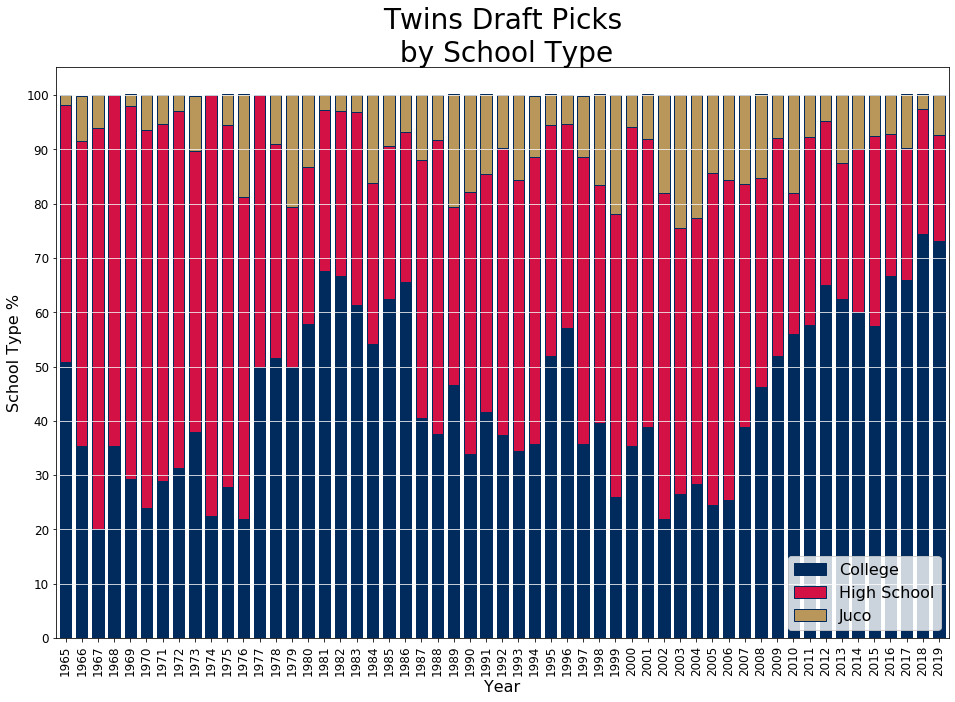

In [12]:
#Bar chart of table above

colors = ["#002B5C", "#D31145", "#B9975B"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#002B5C", stacked = True, figsize = (16, 10.5))
plt.title("Twins Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Twins Draft Picks by School Type.png")
plt.show()